# Classifying Masculinity with KMeans++

In this project, I will be investigating the way people think about masculinity by applying the KMeans algorithm to data from  FiveThirtyEight. FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

FiveThirtyEight and WNYC studios used `masculinity-survey.pdf` to get their male readers' thoughts on masculinity. I'm going to try to find more insights into the survey responses by using a KMeans classifier.

In [1]:
# Investigating the data
import pandas as pd

survey = pd.read_csv("masculinity.csv")
print(survey.columns)
print(len(survey))
print(survey["q0007_0001"].value_counts())
print(survey.head())

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

# Mapping the Data

In order to start thinking about using the KMeans algorithm with this data, the survey responses need to be converted into numerical data. Consider question 7. The data can't be clustered using the phrases `"Often"` or `"Rarely"`, but those phrases can be converted into numbers. For example, the data can be mapped in the following way: 
* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.

Note that it's important that these responses are somewhat linear. `"Often"` is at one end of the spectrum with `"Never, and not open to it"` at the other. The other values fall in sequence between the two.

# Full list of questions asked in question 7, located in 'masculinity-survey.pdf'

# How often would you say you do each of the following?

1. Ask a friend for professional advice

2. Ask a friend for personal advice

3. Express physical affection to male friends, like hugging, rubbing shoulders 

4. Cry

5. Get in a physical fight with another person

6. Have sexual relations with women, including anything from kissing to sex 

7. Have sexual relations with men, including anything from kissing to sex 

8. Watch sports of any kind

9. Work out

10. See a therapist

11. Feel lonely or isolated

In [2]:
# Selection of questions to map for KMeans
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]
for col in cols_to_map:
    survey[col] = survey[col].map(
        {"Often": 4, "Sometimes": 3, "Rarely": 2, "Never, but open to it": 1, "Never, and not open to it": 0})

# Plotting the Data

I now have 11 different features that can be used in the KMeans algorithm. Before I jump into clustering, I will graph some of these features on a 2D graph.

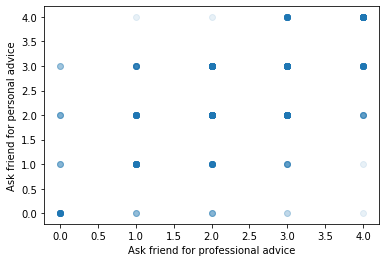

In [10]:
from matplotlib import pyplot as plt

plt.scatter(survey["q0007_0001"], survey["q0007_0002"], alpha = 0.1)
plt.xlabel("Ask friend for professional advice")
plt.ylabel("Ask friend for personal advice")
plt.show()

# Building the KMeans Model

It's now time to start clustering! There are so many interesting questions we could ask about this data. Let's start by seeing if clusters form based on traditionally masculine concepts. 

First I will consider the the first four sub-questions in question 7. Those four activities aren't necessarily seen as traditionally masculine. On the other hand, sub-questions 5, 8, and 9 are often seen as very masculine activities. What would happen if 2 clusters were found based on those 7 questions? Would we find clusters that represent traditionally feminine and traditionally masculine people? Let's find out.

In [4]:
from sklearn.cluster import KMeans

# The 7 survey responses that will be focused on
questions_of_interest = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", 
                         "q0007_0008", "q0007_0009"]

# Creating a new dataframe without NaN values 
rows_to_cluster = survey.dropna(subset = questions_of_interest)

# Building and fitting the KMeans classifier 
# 1 cluster represents traditionally masculine answers while the other cluster represents traditionally feminine answers
# 1 cluster for each, so n_clusters = 2
classifier = KMeans(n_clusters = 2)
classifier.fit(rows_to_cluster[questions_of_interest])
print(classifier.cluster_centers_)

[[2.84548105 2.81632653 2.84110787 2.39941691 0.69387755 3.06997085
  2.90087464]
 [1.87830688 1.84391534 0.85185185 1.72486772 0.57142857 2.64021164
  1.97089947]]


# Separating the Cluster Members

When looking at the two clusters, the first four numbers represent the traditionally feminine activities and the last three represent the traditionally masculine activities. If the data points separated into a feminine cluster and a masculine cluster, one would expect to see one cluster to have high values for the first four numbers and the other cluster to have high values for the last three numbers.

Instead, the first cluster has a higher value in every feature. Since a higher number means the person was more likely to "often" do something, the clusters seem to represent "people who do things" and "people who don't do things".

I might be able to find out more information about these clusters by looking at the specific members of each cluster.

In [5]:
# Creating lists of cluster indices for the two clusters
cluster_zero_indices = []
cluster_one_indices = []

for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
        
print(cluster_zero_indices)

[0, 2, 3, 5, 8, 11, 13, 15, 16, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 50, 56, 59, 60, 61, 64, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 80, 81, 83, 85, 91, 93, 96, 99, 100, 102, 103, 104, 105, 108, 110, 111, 112, 114, 115, 120, 121, 122, 124, 125, 126, 127, 133, 135, 136, 137, 138, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 177, 182, 183, 185, 186, 188, 190, 191, 192, 193, 194, 197, 200, 202, 203, 204, 205, 206, 207, 208, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 232, 234, 235, 238, 239, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 257, 258, 259, 262, 265, 266, 267, 268, 269, 270, 271, 273, 274, 276, 277, 278, 279, 280, 282, 285, 287, 289, 290, 292, 293, 294, 295, 298, 302, 303, 304, 306, 307, 308, 309, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 326, 3

# Investigating the Cluster Members

Now that I have the indices for each cluster, I will try and gain some insight into these two clusters. 

In [6]:
# Creating dataframes for the 2 clusters
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

Reminder of traditionally masculine activities:

q0007_005: Get in a physical fight with another person
 
q0007_0008: Watch sports of any kind

q0007_0009: Work out

* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.

In [7]:
masc = ["q0007_0005", "q0007_0008", "q0007_0009"]
for q in masc:
    print("Cluster 0:")
    print(cluster_zero_df[q].value_counts()/len(cluster_zero_df))
    print("Cluster 1:")
    print(cluster_one_df[q].value_counts()/len(cluster_one_df))

Cluster 0:
0.0    0.571429
2.0    0.209913
1.0    0.193878
3.0    0.018950
4.0    0.005831
Name: q0007_0005, dtype: float64
Cluster 1:
0.0    0.640212
1.0    0.182540
2.0    0.150794
3.0    0.018519
4.0    0.007937
Name: q0007_0005, dtype: float64
Cluster 0:
4.0    0.441691
3.0    0.297376
2.0    0.190962
0.0    0.040816
1.0    0.029155
Name: q0007_0008, dtype: float64
Cluster 1:
4.0    0.351852
3.0    0.280423
2.0    0.171958
0.0    0.148148
1.0    0.047619
Name: q0007_0008, dtype: float64
Cluster 0:
3.0    0.351312
4.0    0.320700
2.0    0.258017
1.0    0.048105
0.0    0.021866
Name: q0007_0009, dtype: float64
Cluster 1:
2.0    0.320106
3.0    0.224868
0.0    0.179894
1.0    0.148148
4.0    0.126984
Name: q0007_0009, dtype: float64


Reminder of traditionally feminine activities:

q0007_0001: Ask a friend for professional advice
 
q0007_0002: Ask a friend for personal advice

q0007_0003: Express physical affection to male friends, like hugging, rubbing shoulders

q0007_0004: Cry

* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.

In [8]:
fem = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004"]
for q in fem:
    print("Cluster 0:")
    print(cluster_zero_df[q].value_counts()/len(cluster_zero_df))
    print("Cluster 1:")
    print(cluster_one_df[q].value_counts()/len(cluster_one_df))

Cluster 0:
3.0    0.553936
2.0    0.224490
4.0    0.174927
1.0    0.034985
0.0    0.011662
Name: q0007_0001, dtype: float64
Cluster 1:
2.0    0.354497
3.0    0.275132
1.0    0.238095
0.0    0.105820
4.0    0.026455
Name: q0007_0001, dtype: float64
Cluster 0:
3.0    0.539359
2.0    0.271137
4.0    0.155977
1.0    0.032070
0.0    0.001458
Name: q0007_0002, dtype: float64
Cluster 1:
2.0    0.433862
3.0    0.240741
1.0    0.190476
0.0    0.119048
4.0    0.015873
Name: q0007_0002, dtype: float64
Cluster 0:
3.0    0.437318
2.0    0.314869
4.0    0.220117
1.0    0.018950
0.0    0.008746
Name: q0007_0003, dtype: float64
Cluster 1:
0.0    0.523810
2.0    0.235450
1.0    0.174603
3.0    0.058201
4.0    0.007937
Name: q0007_0003, dtype: float64
Cluster 0:
2.0    0.447522
3.0    0.411079
1.0    0.061224
4.0    0.052478
0.0    0.027697
Name: q0007_0004, dtype: float64
Cluster 1:
2.0    0.465608
1.0    0.190476
3.0    0.179894
0.0    0.148148
4.0    0.015873
Name: q0007_0004, dtype: float64


In [9]:
print("Cluster Zero:")
print(cluster_zero_df["educ4"].value_counts()/len(cluster_zero_df))
print("Cluster One:")
print(cluster_one_df["educ4"].value_counts()/len(cluster_one_df))

Cluster Zero:
Post graduate degree    0.365889
College or more         0.330904
Some college            0.230321
High school or less     0.072886
Name: educ4, dtype: float64
Cluster One:
Some college            0.314815
College or more         0.285714
Post graduate degree    0.251323
High school or less     0.145503
Name: educ4, dtype: float64


# Discussion

My analysis seems to indicate that the survey responses to the 7 questions that were focused on do not result in people falling into a "masculine" category or a "feminine" category. Instead, they seem to be divided by their level of education. 

Special thanks to the team at FiveThirtyEight and Codecademy for providing me with access to this data!